In [1]:
import numpy as np
import scipy.sparse as sp_sparse

import pandas as pd

import matplotlib.pyplot as plt

import sklearn as sk
import sklearn.datasets as sk_data
import sklearn.metrics as metrics
import string as string
from sklearn import preprocessing
import sklearn.feature_extraction.text as sk_text


import seaborn as sns
import json
%matplotlib inline

In [2]:
#fbusiness = open('yelp_academic_dataset_business.json',mode='r',encoding='utf-8',errors='ignore')
#freviews = open('yelp_academic_dataset_review.json',mode='r',encoding='utf-8',errors='ignore')

In [3]:
def remove_nulls(d):
    return {k: v for k, v in d.items() if v is not None}

In [4]:
from string import digits

remove_digits = str.maketrans('', '', digits)

In [5]:
categories = ["Beauty & Spa","Bars","Shopping"]
business=[]
with open('yelp_academic_dataset_business.json',mode='r',encoding='utf-8',errors='ignore') as fbusiness:
    for jsonline in fbusiness:
        read = json.loads(jsonline)
        if read['categories'] is None:
            continue
        if read["city"] == "Toronto" and any(item in read["categories"].split(',') for item in categories) and read["review_count"] >= 10  :
                business.append(read)


In [6]:
df = pd.DataFrame(business)
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,QgdO29fGB-eBNe1BzHR7YQ,DEQ Terrace & Lounge,"The Ritz-Carlton, 181 Wellington Street West",Toronto,ON,M5V 3G7,43.645413,-79.387295,4.0,68,1,"{'Alcohol': 'u'full_bar'', 'NoiseLevel': 'u'av...","Bars, Lounges, Nightlife, Restaurants, Wine Ba...","{'Monday': '11:0-1:0', 'Tuesday': '11:0-1:0', ..."
1,4yl6W0DCdw2VvSmwgGE8dg,Splendid China Tower,4675 Steeles Avenue E,Toronto,ON,M1V 4S5,43.823871,-79.302422,2.0,10,1,"{'BusinessParking': '{'garage': False, 'street...","Shopping, Shopping Centers","{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0'..."
2,OF7N1TA8YEFsD1es84bIWw,Unicorn Pub,175 Eglinton Avenue E,Toronto,ON,M4P 1J4,43.707984,-79.392185,3.0,28,0,"{'HasTV': 'True', 'RestaurantsPriceRange2': '2...","Bars, Pubs, Nightlife","{'Monday': '11:0-2:0', 'Tuesday': '11:0-2:0', ..."
3,oQ5IFGtNDyk0jyjWWcow4A,Mobilicity,542 Yonge Street,Toronto,ON,M4Y 1Y8,43.664301,-79.384314,2.5,14,1,"{'BusinessParking': '{'garage': False, 'street...","Shopping, Mobile Phones","{'Monday': '10:0-20:0', 'Tuesday': '10:0-20:0'..."
4,DHQqJfoWQHHwkbiQBaAJlw,Rasputin Vodka Bar,780 Queen Street E,Toronto,ON,M4M 1H4,43.659426,-79.347496,4.0,22,0,"{'Alcohol': 'u'full_bar'', 'RestaurantsPriceRa...","Bars, Lounges, Nightlife","{'Tuesday': '17:0-0:0', 'Wednesday': '17:0-0:0..."


In [7]:
df.drop(columns=['name','address','city','state',"postal_code","latitude","longitude","stars","review_count","is_open","attributes","hours"],inplace=True)
df.set_index('business_id',inplace=True)
df.insert(1,'Reviews',value='')

In [8]:
df.head()

,categories,Reviews
business_id,,
QgdO29fGB-eBNe1BzHR7YQ,"Bars, Lounges, Nightlife, Restaurants, Wine Ba...",
4yl6W0DCdw2VvSmwgGE8dg,"Shopping, Shopping Centers",
OF7N1TA8YEFsD1es84bIWw,"Bars, Pubs, Nightlife",
oQ5IFGtNDyk0jyjWWcow4A,"Shopping, Mobile Phones",
DHQqJfoWQHHwkbiQBaAJlw,"Bars, Lounges, Nightlife",


In [9]:
with open('yelp_academic_dataset_review.json',mode='r',encoding='utf-8',errors='ignore') as freviews:
    for line in freviews:
        if json.loads(line)['business_id'] in df.index:
            read = json.loads(line)['text'].strip()
            read = read.translate(remove_digits)
            df.at[json.loads(line)['business_id'],'Reviews'] += read

In [10]:
df.reset_index(inplace=True)
df.head()

,business_id,categories,Reviews
0,QgdO29fGB-eBNe1BzHR7YQ,"Bars, Lounges, Nightlife, Restaurants, Wine Ba...",This place is as good as it gets in terms of p...
1,4yl6W0DCdw2VvSmwgGE8dg,"Shopping, Shopping Centers",It's empty but a lot of people visited for a b...
2,OF7N1TA8YEFsD1es84bIWw,"Bars, Pubs, Nightlife",I really wanted to like this place because uni...
3,oQ5IFGtNDyk0jyjWWcow4A,"Shopping, Mobile Phones",great plan - like most Canadian plans should b...
4,DHQqJfoWQHHwkbiQBaAJlw,"Bars, Lounges, Nightlife",Ah yes. Girls night out (with boys too actuall...


In [11]:
for word in categories:
    indices = [i for i, s in enumerate(df.categories) if word in s]
    df.at[indices,'categories']=word

In [12]:
display(df)

,business_id,categories,Reviews
0,QgdO29fGB-eBNe1BzHR7YQ,Bars,This place is as good as it gets in terms of p...
1,4yl6W0DCdw2VvSmwgGE8dg,Shopping,It's empty but a lot of people visited for a b...
2,OF7N1TA8YEFsD1es84bIWw,Bars,I really wanted to like this place because uni...
3,oQ5IFGtNDyk0jyjWWcow4A,Shopping,great plan - like most Canadian plans should b...
4,DHQqJfoWQHHwkbiQBaAJlw,Bars,Ah yes. Girls night out (with boys too actuall...
...,...,...,...
501,W0_0cHCJl-eNxKBcjjXE0g,Bars,Great place for snacks and drinks. The chicke...
502,qd4qMzC2QrlgY4iDBMeLiQ,Shopping,Parking here is very spacious and easy to driv...
503,30cVbUJcsDpqaEM9V_axVQ,Bars,Came here for a summer date and sat in the pat...
504,t-eqMhsXGTVst2dlLIn2jA,Bars,This is a really gorgeous patio in a great spo...


In [13]:
import sklearn.cluster as sk_cluster
vectorizer2 = sk_text.TfidfVectorizer(stop_words = 'english',max_features=3)
X = vectorizer2.fit_transform(df.categories)
print(X.toarray())
print(X.shape)
print('\n')  

k=3
kmeans = sk_cluster.KMeans(n_clusters=k, init='k-means++', max_iter=1000, n_init=1,n_jobs=8)
kmeans.fit_predict(X)
print(kmeans.labels_)
truelabels=kmeans.labels_

[[1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]
(506, 3)


[1 0 1 0 1 2 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1
 1 0 0 1 0 1 1 0 0 1 0 2 1 1 0 0 1 2 1 0 1 0 1 0 1 0 1 1 1 0 2 1 0 0 0 1 1
 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1 1 1 1 2 1 1 1 0 1 1 0 1 0
 0 1 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 0 1 0 2 0 0 0 1 0 0 0 1 0 1 2 0 1 1
 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 0 0 0 1 0 1 1 2 1 1 2 0 1 0 1 1 0 1 2 1 0
 1 1 0 1 2 1 0 0 1 0 0 0 0 0 0 0 0 2 1 1 2 1 0 1 1 1 1 0 0 0 1 1 0 2 0 1 1
 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 2 1
 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 2 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0
 0 0 1 1 2 0 0 1 2 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 2 2 0 0 1
 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 0 1 0 0 2 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 0
 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 2 1 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0
 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 0 1 0 0 1 0
 1 0 0 1 1 

In [14]:
vectorizer = sk_text.TfidfVectorizer(stop_words = 'english',max_features=10000,min_df=2)

X = vectorizer.fit_transform(df.Reviews)
print(X.toarray())
print(X.shape)
print('\n')  
#print (vectorizer.get_feature_names())



[[0.         0.         0.         ... 0.01229508 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
(506, 10000)




In [15]:
def cluster_class_mapping(kmeans_labels,true_labels):
    C= metrics.confusion_matrix(kmeans_labels,true_labels)
    mapping = list(np.argmax(C,axis=1)) #for each row (cluster) find the best class in the confusion matrix
    mapped_kmeans_labels = [mapping[l] for l in kmeans_labels]
    C2= metrics.confusion_matrix(mapped_kmeans_labels,true_labels)
    return mapped_kmeans_labels,C2

In [16]:
import sklearn.cluster as sk_cluster
import sklearn.feature_extraction.text as sk_text

k=3
kmeansclass = sk_cluster.KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
kmeansclass.fit_predict(X)
asc_order_centroids = kmeans.cluster_centers_.argsort()#[:, ::-1]
order_centroids = asc_order_centroids[:,::-1]
terms = vectorizer.get_feature_names()
C = metrics.confusion_matrix(kmeans.labels_,truelabels)

mapped_kmeans_labels,C = cluster_class_mapping(kmeansclass.labels_,truelabels)
print (C)
p = metrics.precision_score(truelabels,mapped_kmeans_labels, average=None)
print(p)
r = metrics.recall_score(truelabels,mapped_kmeans_labels, average = None)
print(r)

[[231  10  25]
 [  4 236   0]
 [  0   0   0]]
[0.86842105 0.98333333 0.        ]
[0.98297872 0.95934959 0.        ]


In [17]:
import sklearn.utils as utils
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, truelabels, test_size=0.4, random_state=0)

In [18]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(303, 10000) (203, 10000) (303,) (203,)


In [19]:
import sklearn.linear_model as linear_model

lr_clf = linear_model.LogisticRegression(solver='lbfgs')
lr_clf.fit(X_train, y_train)
print("classifier score:",lr_clf.score(X_test,y_test))
y_pred = lr_clf.predict(X_test)
print("\naccuracy:",metrics.accuracy_score(y_test,y_pred))
print("\nConfusion matrix")
print(metrics.confusion_matrix(y_test,y_pred))
print("\nPrecision Score per class")
print(metrics.precision_score(y_test,y_pred,average=None))
print("\nAverage Precision Score")
print(metrics.precision_score(y_test,y_pred,average='weighted'))
print("\nRecall Score per class")
print(metrics.recall_score(y_test,y_pred,average=None))
print("\nAverage Recall Score")
print(metrics.recall_score(y_test,y_pred,average='weighted'))
print("\nF1-score Score per class")
print(metrics.f1_score(y_test,y_pred,average=None))
print("\nAverage F1 Score")
print(metrics.f1_score(y_test,y_pred,average='weighted'))

classifier score: 0.9359605911330049

accuracy: 0.9359605911330049

Confusion matrix
[[91  2  0]
 [ 1 99  0]
 [10  0  0]]

Precision Score per class
[0.89215686 0.98019802 0.        ]

Average Precision Score
0.8915782769236066

Recall Score per class
[0.97849462 0.99       0.        ]

Average Recall Score
0.9359605911330049

F1-score Score per class
[0.93333333 0.98507463 0.        ]

Average F1 Score
0.9128446437761929


In [20]:
from sklearn import svm

#svm_clf = svm.LinearSVC()
#svm_clf = svm.SVC(kernel = 'poly')
svm_clf = svm.SVC()
svm_clf.fit(X_train,y_train)
print("classifier score:",svm_clf.score(X_test,y_test))
y_pred = svm_clf.predict(X_test)
print("\naccuracy:",metrics.accuracy_score(y_test,y_pred))
print("\nConfusion matrix")
print(metrics.confusion_matrix(y_test,y_pred))
print("\nPrecision Score per class")
print(metrics.precision_score(y_test,y_pred,average=None))
print("\nAverage Precision Score")
print(metrics.precision_score(y_test,y_pred,average='weighted'))
print("\nRecall Score per class")
print(metrics.recall_score(y_test,y_pred,average=None))
print("\nAverage Recall Score")
print(metrics.recall_score(y_test,y_pred,average='weighted'))
print("\nF1-score Score per class")
print(metrics.f1_score(y_test,y_pred,average=None))
print("\nAverage F1 Score")
print(metrics.f1_score(y_test,y_pred,average='weighted'))

classifier score: 0.9359605911330049

accuracy: 0.9359605911330049

Confusion matrix
[[91  2  0]
 [ 1 99  0]
 [10  0  0]]

Precision Score per class
[0.89215686 0.98019802 0.        ]

Average Precision Score
0.8915782769236066

Recall Score per class
[0.97849462 0.99       0.        ]

Average Recall Score
0.9359605911330049

F1-score Score per class
[0.93333333 0.98507463 0.        ]

Average F1 Score
0.9128446437761929


In [21]:
from sklearn import tree

dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

print("classifier accuracy:",dtree.score(X_test,y_test))

y_pred = dtree.predict(X_test)
y_prob = dtree.predict_proba(X_test)
print("classifier predictions:",y_pred[:10])
print("ground truth labels   :",y_test[:10])
print(y_prob[:10])
print("accuracy:",metrics.accuracy_score(y_test,y_pred))
print("\nConfusion matrix")
print(metrics.confusion_matrix(y_test,y_pred))
print("\nPrecision Score per class")
print(metrics.precision_score(y_test,y_pred,average=None))
print("\nAverage Precision Score")
print(metrics.precision_score(y_test,y_pred,average='weighted'))
print("\nRecall Score per class")
print(metrics.recall_score(y_test,y_pred,average=None))
print("\nAverage Recall Score")
print(metrics.recall_score(y_test,y_pred,average='weighted'))
print("\nF1-score Score per class")
print(metrics.f1_score(y_test,y_pred,average=None))
print("\nAverage F1 Score")
print(metrics.f1_score(y_test,y_pred,average='weighted'))


classifier accuracy: 0.8768472906403941
classifier predictions: [2 0 0 0 1 0 0 0 0 1]
ground truth labels   : [2 0 0 0 1 0 0 0 0 1]
[[0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]
accuracy: 0.8768472906403941

Confusion matrix
[[82  7  4]
 [ 9 91  0]
 [ 4  1  5]]

Precision Score per class
[0.86315789 0.91919192 0.55555556]

Average Precision Score
0.8756080378584915

Recall Score per class
[0.88172043 0.91       0.5       ]

Average Recall Score
0.8768472906403941

F1-score Score per class
[0.87234043 0.91457286 0.52631579]

Average F1 Score
0.8760990339968757


['bars', 'beauty', 'shopping']


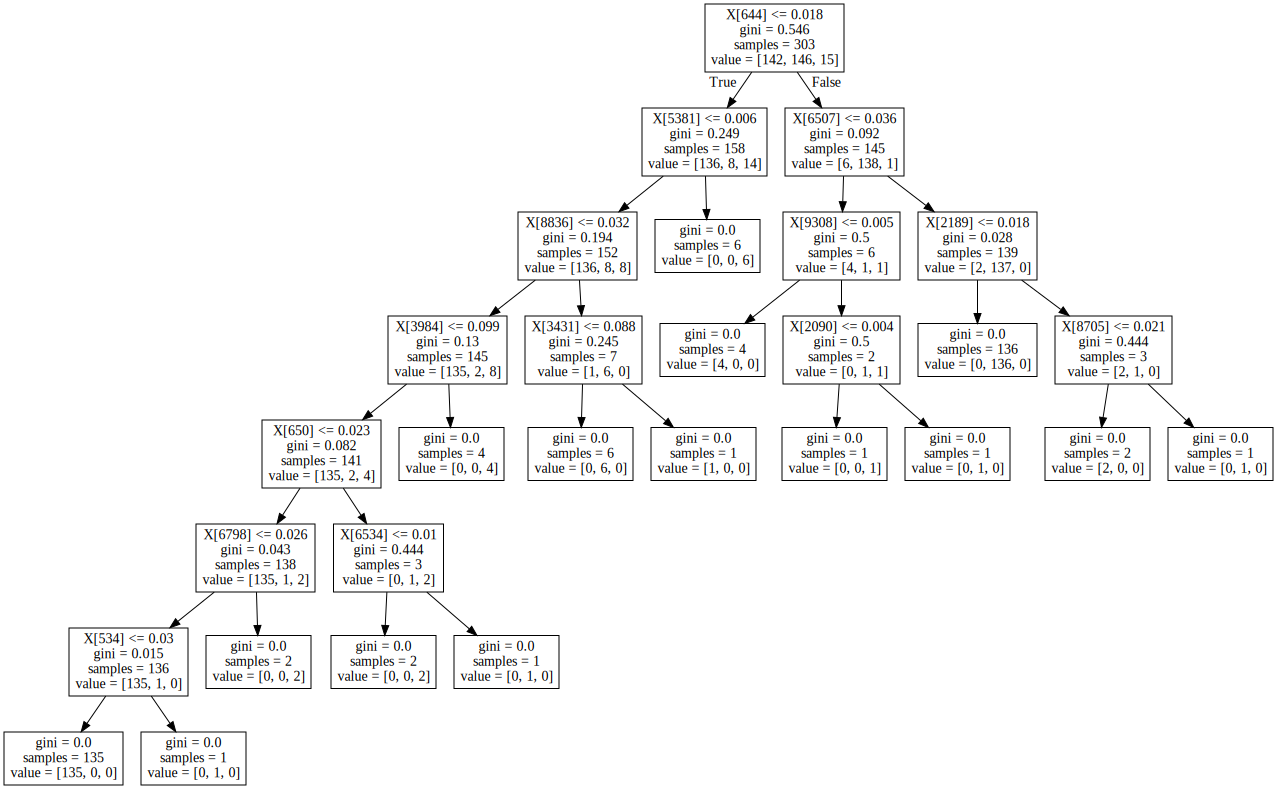

In [22]:
import graphviz 
print(vectorizer2.get_feature_names())
dot_data = tree.export_graphviz(dtree,out_file=None)
graph = graphviz.Source(dot_data)
graph

0.8866995073891626


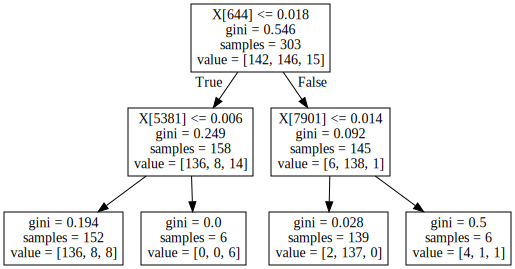

In [23]:
dtree2 = tree.DecisionTreeClassifier(max_depth=2)
dtree2 = dtree2.fit(X_train, y_train)
print(dtree2.score(X_test,y_test))
dot_data2 = tree.export_graphviz(dtree2,out_file=None)
graph2 = graphviz.Source(dot_data2)
graph2

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
print("classifier score:", knn.score(X_test,y_test))

y_pred = knn.predict(X_test)

print("\naccuracy:",metrics.accuracy_score(y_test,y_pred))
print("\nConfusion matrix")
print(metrics.confusion_matrix(y_test,y_pred))
print("\nPrecision Score per class")
print(metrics.precision_score(y_test,y_pred,average=None))
print("\nAverage Precision Score")
print(metrics.precision_score(y_test,y_pred,average='weighted'))
print("\nRecall Score per class")
print(metrics.recall_score(y_test,y_pred,average=None))
print("\nAverage Recall Score")
print(metrics.recall_score(y_test,y_pred,average='weighted'))
print("\nF1-score Score per class")
print(metrics.f1_score(y_test,y_pred,average=None))
print("\nAverage F1 Score")
print(metrics.f1_score(y_test,y_pred,average='weighted'))

classifier score: 0.9556650246305419

accuracy: 0.9556650246305419

Confusion matrix
[[ 86   5   2]
 [  0 100   0]
 [  2   0   8]]

Precision Score per class
[0.97727273 0.95238095 0.8       ]

Average Precision Score
0.9562781225342801

Recall Score per class
[0.92473118 1.         0.8       ]

Average Recall Score
0.9556650246305419

F1-score Score per class
[0.95027624 0.97560976 0.8       ]

Average F1 Score
0.9553530355541424


from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Number of mislabeled points out of a total %d points : %d"
% (X_test.shape[0], (y_test != y_pred).sum()))


In [25]:
import sklearn.model_selection as model_selection
scores_dtree = model_selection.cross_validate(#lr_clf,
                                          #svm_clf,
                                          #knn,
                                          dtree,
                                          X,
                                          y,
                                          scoring=['precision_weighted','recall_weighted','f1_weighted'],
                                          cv=5)
print (scores_dtree)
print (scores_dtree['test_precision_weighted'].mean(),scores_dtree['test_recall_weighted'].mean(),scores_dtree['test_f1_weighted'].mean())

NameError: name 'y' is not defined

In [200]:
scores_knn = model_selection.cross_validate(#lr_clf,
                                          #svm_clf,
                                          knn,
                                          #dtree,
                                          X,
                                          y,
                                          scoring=['precision_weighted','recall_weighted','f1_weighted'],
                                          cv=5)
print (scores_knn)
print (scores_knn['test_precision_weighted'].mean(),scores_knn['test_recall_weighted'].mean(),scores_knn['test_f1_weighted'].mean())

{'fit_time': array([0.00197124, 0.00097156, 0.00097108, 0.00102997, 0.00199914]), 'score_time': array([0.01402855, 0.01502919, 0.01300097, 0.01297092, 0.00899863]), 'test_precision_weighted': array([0.40092006, 0.2361271 , 0.2088441 , 0.20297419, 0.24445069]), 'test_recall_weighted': array([0.42156863, 0.31683168, 0.25742574, 0.23762376, 0.30693069]), 'test_f1_weighted': array([0.41097199, 0.26323668, 0.22787657, 0.21592752, 0.26372603])}
0.25866322704826183 0.30807610172781985 0.2763477582788586


In [201]:
scores_svm = model_selection.cross_validate(#lr_clf,
                                          svm_clf,
                                          #knn,
                                          #dtree,
                                          X,
                                          y,
                                          scoring=['precision_weighted','recall_weighted','f1_weighted'],
                                          cv=5)
print (scores_svm)
print (scores_svm['test_precision_weighted'].mean(),scores_svm['test_recall_weighted'].mean(),scores_svm['test_f1_weighted'].mean())

{'fit_time': array([0.01099944, 0.0079987 , 0.00696111, 0.00700521, 0.00700021]), 'score_time': array([0.00599957, 0.00403404, 0.00400281, 0.00399494, 0.0039444 ]), 'test_precision_weighted': array([0.4704882 , 0.64660387, 0.55535869, 0.42365924, 0.41423801]), 'test_recall_weighted': array([0.49019608, 0.53465347, 0.51485149, 0.48514851, 0.43564356]), 'test_f1_weighted': array([0.35410497, 0.42910445, 0.39367333, 0.35030596, 0.42465857])}
0.5020696024232539 0.49209862162686857 0.39036945529060074


In [202]:
scores_lr = model_selection.cross_validate(lr_clf,
                                          #svm_clf,
                                          #knn,
                                          #dtree,
                                          X,
                                          y,
                                          scoring=['precision_weighted','recall_weighted','f1_weighted'],
                                          cv=5)
print (scores_lr)
print (scores_lr['test_precision_weighted'].mean(),scores_lr['test_recall_weighted'].mean(),scores_lr['test_f1_weighted'].mean())

{'fit_time': array([0.01800036, 0.01300025, 0.01600122, 0.01400065, 0.01399994]), 'score_time': array([0.00300026, 0.00299931, 0.00200009, 0.00300026, 0.00299978]), 'test_precision_weighted': array([0.4704882 , 0.64660387, 0.55535869, 0.42365924, 0.41423801]), 'test_recall_weighted': array([0.49019608, 0.53465347, 0.51485149, 0.48514851, 0.43564356]), 'test_f1_weighted': array([0.35410497, 0.42910445, 0.39367333, 0.35030596, 0.42465857])}
0.5020696024232539 0.49209862162686857 0.39036945529060074


Παρατηρώ ότι όλα τα μοντέλα εκτός από το knn έχουν ίδια mean των σταθμισμένων scores. Το knn μοντέλο δίνει περίπου το μισό σταθμισμένο precision σε σύγκριση με τα υπόλοιπα.

In [61]:
X_train, X_test, y_train, y_test = train_test_split(df.Reviews.tolist(), df.categories.tolist(), test_size=0.4, random_state=1)
#print(X_train, X_test, y_train, y_test)

em. I even bought a robe for my grandmother at another store and they changed me $ for the most lovely wrapping job I\'ve ever seen.\n\nFriendly and warm. I will keep stopping by his shop, again and again.If you are anything like me and spend hours browsing stores like Chapters you\'ll love this place ! Well I don\'t know if that is a fair comparison as this place is nothing like the branded items you find at Chapters. I came after work late in the evening and the atmosphere inside was enough to put me at ease. The store is quite small so I really don\'t understand how I ended up spending nearly an hour in there ! They have quite a few items I had seen online but could never find in stores. There were quite a few Alice in Wonderland and Le Petit Prince Vintage items to be found. I picked up a really cute handmade card for my friend, a couple of sticky notes as well as a pen for $ ! The prices are a little steep so it adds up quickly. It\'s a wonderfully adorable place full of unique it

In [74]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
english_stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\miltosv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\miltosv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [75]:
X_train_nltk = []
y_train_nltk = []
for x,y in zip(X_train,y_train):
    wt = word_tokenize(x.lower())
    doc = [w for w in wt if w not in string.punctuation]
    if len(doc) == 0: continue
    X_train_nltk.append(doc)
    y_train_nltk.append(y)


In [77]:
X_test_nltk = []
y_test_nltk = []

for x,y in zip(X_test,y_test):
    wt = word_tokenize(x.lower())
    doc = [w for w in wt if (w not in english_stop_words) and (w not in string.punctuation)]
    if len(doc) == 0: continue    
    X_test_nltk.append(doc)
    y_test_nltk.append(y)

In [78]:
#print(X_train_nltk)
#print(y_train_nltk)

In [79]:
import gensim
import gensim.downloader as api
#path = api.load("word2vec-google-news-300", return_path=True)
#print(path)
path = 'GoogleNews-vectors-negative300.bin.gz'
g_model = gensim.models.KeyedVectors.load_word2vec_format(path, binary=True)  

In [80]:
X_train_gmodel = []
for x in X_train_nltk:
    vx = np.zeros(300)
    length = 0
    for w in x: 
        if w in g_model.wv:
            length += 1
            vx += g_model[w]
    if length != 0: vx /= length
    X_train_gmodel.append(vx)

In [81]:
X_test_gmodel = []
for x in X_test_nltk:
    vx = np.zeros(300)
    length = 0
    for w in x: 
        if (w not in g_model.wv): continue
        length += 1
        vx += g_model.wv[w]
    if length != 0: vx /= length
    X_test_gmodel.append(vx)

In [89]:
lr_clf.fit(X_train_gmodel, np.array(y_train_nltk))
svm_clf.fit(X_train_gmodel, np.array(y_train_nltk))
knn.fit(X_train_gmodel, np.array(y_train_nltk))
dtree.fit(X_train_gmodel, np.array(y_train_nltk))

DecisionTreeClassifier()

In [90]:
#lr_clf.score(np.array(X_test_gmodel),y_test_nltk)

SVC()

In [95]:
scores_dtree_google = model_selection.cross_validate(#lr_clf,
                                          #svm_clf,
                                          #knn,
                                          dtree,
                                          X_test_gmodel,
                                          y_test_nltk,
                                          scoring=['precision_weighted','recall_weighted','f1_weighted'],
                                          cv=5)
print (scores_dtree_google)
print (scores_dtree_google['test_precision_weighted'].mean(),scores_dtree_google['test_recall_weighted'].mean(),scores_dtree_google['test_f1_weighted'].mean())

{'fit_time': array([0.01900148, 0.01621175, 0.0150001 , 0.0200007 , 0.01996589]), 'score_time': array([0.00299859, 0.        , 0.00500083, 0.00503254, 0.00499892]), 'test_precision_weighted': array([0.84388878, 0.78296596, 0.81560976, 0.80297619, 0.92611111]), 'test_recall_weighted': array([0.82926829, 0.7804878 , 0.85365854, 0.825     , 0.925     ]), 'test_f1_weighted': array([0.83210283, 0.77971351, 0.82391511, 0.81263514, 0.92494802])}
0.8343103581417786 0.8426829268292682 0.834662923065362


In [96]:
scores_knn_google = model_selection.cross_validate(#lr_clf,
                                          #svm_clf,
                                          knn,
                                          #dtree,
                                          X_test_gmodel,
                                          y_test_nltk,
                                          scoring=['precision_weighted','recall_weighted','f1_weighted'],
                                          cv=5)
print (scores_knn_google)
print (scores_knn_google['test_precision_weighted'].mean(),scores_knn_google['test_recall_weighted'].mean(),scores_knn_google['test_f1_weighted'].mean())

{'fit_time': array([0.00599957, 0.0079999 , 0.0059998 , 0.00306845, 0.00600171]), 'score_time': array([0.01100016, 0.01199961, 0.01000047, 0.01251841, 0.01000905]), 'test_precision_weighted': array([0.95243902, 1.        , 0.97682927, 0.9072861 , 0.93522727]), 'test_recall_weighted': array([0.95121951, 1.        , 0.97560976, 0.9       , 0.925     ]), 'test_f1_weighted': array([0.94746717, 1.        , 0.97348343, 0.89579946, 0.92452962])}
0.9543563323333769 0.9503658536585367 0.9482559337681288


In [97]:
scores_svm_google = model_selection.cross_validate(#lr_clf,
                                          svm_clf,
                                          #knn,
                                          #dtree,
                                          X_test_gmodel,
                                          y_test_nltk,
                                          scoring=['precision_weighted','recall_weighted','f1_weighted'],
                                          cv=5)
print (scores_svm_google)
print (scores_svm_google['test_precision_weighted'].mean(),scores_svm_google['test_recall_weighted'].mean(),scores_svm_google['test_f1_weighted'].mean())

{'fit_time': array([0.00700021, 0.00803018, 0.00699949, 0.00700212, 0.00699925]), 'score_time': array([0.00600028, 0.00497031, 0.00502968, 0.00599837, 0.00500083]), 'test_precision_weighted': array([0.88159117, 0.90687361, 0.86363636, 0.83244949, 0.8547619 ]), 'test_recall_weighted': array([0.92682927, 0.95121951, 0.92682927, 0.875     , 0.9       ]), 'test_f1_weighted': array([0.90364405, 0.92799071, 0.89292088, 0.85105471, 0.87625   ])}
0.8678625101186077 0.9159756097560976 0.8903720695955972


In [98]:
scores_lr_google = model_selection.cross_validate(lr_clf,
                                          #svm_clf,
                                          #knn,
                                          #dtree,
                                          X_test_gmodel,
                                          y_test_nltk,
                                          scoring=['precision_weighted','recall_weighted','f1_weighted'],
                                          cv=5)
print (scores_lr_google)
print (scores_lr_google['test_precision_weighted'].mean(),scores_lr_google['test_recall_weighted'].mean(),scores_lr_google['test_f1_weighted'].mean())

{'fit_time': array([0.02700138, 0.03002906, 0.02100086, 0.02099943, 0.01866841]), 'score_time': array([0.00400853, 0.00497007, 0.00399947, 0.00399995, 0.00404859]), 'test_precision_weighted': array([0.88159117, 0.90687361, 0.84623542, 0.83244949, 0.8547619 ]), 'test_recall_weighted': array([0.92682927, 0.95121951, 0.90243902, 0.875     , 0.9       ]), 'test_f1_weighted': array([0.90364405, 0.92799071, 0.87016982, 0.85105471, 0.87625   ])}
0.8643823211665206 0.9110975609756098 0.8858218577878005


In [108]:
precisions = [scores_lr_google['test_precision_weighted'].mean(),scores_svm_google['test_precision_weighted'].mean(),scores_knn_google['test_precision_weighted'].mean(),scores_dtree_google['test_precision_weighted'].mean()]#lr,svm,knn,dtree IN THAT ORDER
recalls = [scores_lr_google['test_recall_weighted'].mean(),scores_svm_google['test_recall_weighted'].mean(),scores_knn_google['test_recall_weighted'].mean(),scores_dtree_google['test_recall_weighted'].mean()]
f1s =[scores_lr_google['test_f1_weighted'].mean(),scores_svm_google['test_f1_weighted'].mean(),scores_knn_google['test_f1_weighted'].mean(),scores_dtree_google['test_f1_weighted'].mean()]
methods = 'lr,svm,knn,dtree'.split(',')
print(methods,f1s,recalls,precisions)

['lr', 'svm', 'knn', 'dtree'] [0.8858218577878005, 0.8903720695955972, 0.9482559337681288, 0.834662923065362] [0.9110975609756098, 0.9159756097560976, 0.9503658536585367, 0.8426829268292682] [0.8643823211665206, 0.8678625101186077, 0.9543563323333769, 0.8343103581417786]


<BarContainer object of 4 artists>

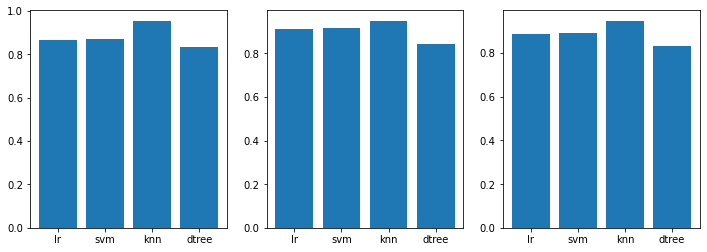

In [111]:
fig, axes = plt.subplots(1,3, figsize = (12,4))
axes[0].bar(methods,precisions)
axes[1].bar(methods,recalls)
axes[2].bar(methods,f1s)

Όπως παρατηρούμε με την χρήση του Google Word2Vec όλα τα προηγούμενα μοντέλα των classifiers δίνουν καλύτερα αποτελέσματα. Εδώ το knn δίνει τα καλύτερα αποτελέσματα ενώ με την χρήση tf id έδινε τα χειρότερα